In [1]:
%load_ext watermark
%watermark

2018-12-21T12:35:20-03:00

CPython 3.6.0
IPython 7.2.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,10) # 10 pulgadas de ancho y 10 de alto para todos los plots

### Lectura de datos

In [5]:
vehicles = pd.read_pickle("../Data/vehiculos.3.variables_agrupadas.pkl")

In [6]:
vehicles.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

In [7]:
vehicles.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [8]:
from ipywidgets import interact, fixed

### Recuento por multiples grupos

In [10]:
def pivot_counting(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [11]:
fuel_consumption = pivot_counting(vehicles,"combustible_tipo","consumo_tipo", "year")
fuel_consumption

consumo_tipo,muy bajo,bajo,moderado,alto,muy alto
combustible_tipo,,,,,
Hibrido,61.0,6.0,1.0,2.0,NaN
Normal,5686.0,4931.0,5736.0,3158.0,4567.0
Otros tipos de combustible,521.0,340.0,508.0,482.0,586.0
Premium,1386.0,2211.0,3836.0,1146.0,1627.0


In [18]:
def heatmap_counting_types(df, col1, col2):
    pivot_table = pivot_counting(df,col1, col2, "year")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [19]:
interact(heatmap_counting_types, col1=vehicles.columns, col2=vehicles.columns, df=fixed(vehicles));

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

### Conclusions


- There are more low-consumption two-wheel vehicles than 4-wheel drive
- Manufacturers concentrate more on small / low consumption motor vehicles and very large / high consumption engine
- Most cars have automatic transmission, with small cars having similar values ​​of automatic and manual cars
- There are a number of trucks that are more polluting than any other type of car

### Averages by categorical variables

In [20]:
def means_by_category(col_grupo, col_calculo):
    vehicles.groupby(col_grupo)[col_calculo].mean().plot.barh()
    plt.ylabel(col_grupo)
    plt.xlabel('Average values of {}'.format(col_calculo))
    plt.show()

In [21]:
numerical_columns = vehicles.select_dtypes(['int', 'float']).columns
categorical_columns = vehicles.select_dtypes(['object', 'category']).columns
type_columns = [col for col in vehicles.columns if col.endswith("_tipo")]

In [22]:
interact(means_by_category, col_grupo=categorical_columns, col_calculo=numerical_columns);

interactive(children=(Dropdown(description='col_grupo', options=('fabricante', 'modelo', 'transmision', 'tracc…

#### Conclusions


- Vehicles with automatic transmission have slightly higher CO2 and consumption values

- Vans and vans have the highest consumption (around 0.25 liters / mile). On the other hand, family and small cars have the lowest gasoline consumption (~ 0.15 liters / mile)

- Hybrid vehicles emit less than half of CO2 than other vehicles (which have similar emissions)

### Average for multiple types

In [25]:
def pivot_media(rows, columns, calc_field):
    df_pivot = vehicles.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.mean
                             ).dropna(axis=0, how='all')
    return df_pivot

In [26]:
pivot_media("combustible_tipo","clase_tipo", "co2")

clase_tipo,Camionetas,Coche Familiar,Coches Grandes,Coches Medianos,Coches pequeños,Deportivos,Furgoneta,Vehículos Especiales
combustible_tipo,,,,,,,,
Hibrido,NaN,NaN,221.875000,127.380952,149.645161,260.222222,106.000000,NaN
Normal,560.216673,399.493604,461.726146,409.673286,384.393158,476.788251,590.807827,543.838453
Otros tipos de combustible,552.958788,391.161924,447.490631,412.662543,348.957271,520.672914,602.867693,559.031182
Premium,644.975464,439.247746,520.511823,479.033374,467.943014,515.605886,547.793508,599.268790


In [27]:
def heatmap_medias_tipos(col1, col2, col3):
    pivot_table = pivot_media(col1, col2, col3)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

In [28]:
interact(heatmap_medias_tipos, col1=vehicles.columns, col2=vehicles.columns, col3=numerical_columns);

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

#### Conclusions


- Premium gas trucks consume 38% more than small vehicles that use the same type of gasoline

###  Comparison of trends (temporary)


In this particular dataset, I have a temporary variable `year`. To which we take a look in a previous section but that should be observed again. We can consider it an ordinal variable (since it is not a continuous variable).

For which it makes sense to see evolution. For this, line graphics are ideal.

In [29]:
vehicles_pre_2017 = vehicles.query("year<2017")

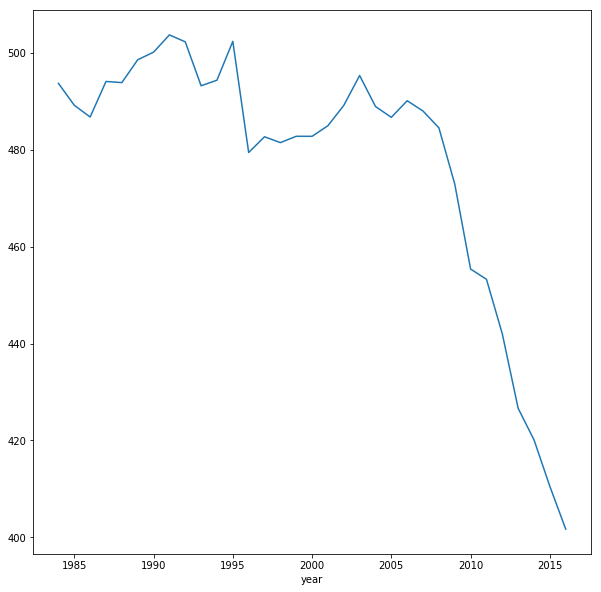

In [30]:
vehicles_pre_2017.groupby('year')['co2'].mean().plot()


In general, the emission of CO2 has been reduced considerably over time

In [33]:
def evolución_means(col_calculo):
    vehicles_pre_2017.groupby('year')[col_calculo].mean().plot()
    plt.show()

In [34]:
interact(evolución_means, col_calculo=numerical_columns);

interactive(children=(Dropdown(description='col_calculo', options=('year', 'desplazamiento', 'cilindros', 'con…


Historically the displacement (and displacement) has been increasing. in manufactured vehicles, but as of 2010 this trend is reversed. both variables are linearly related.

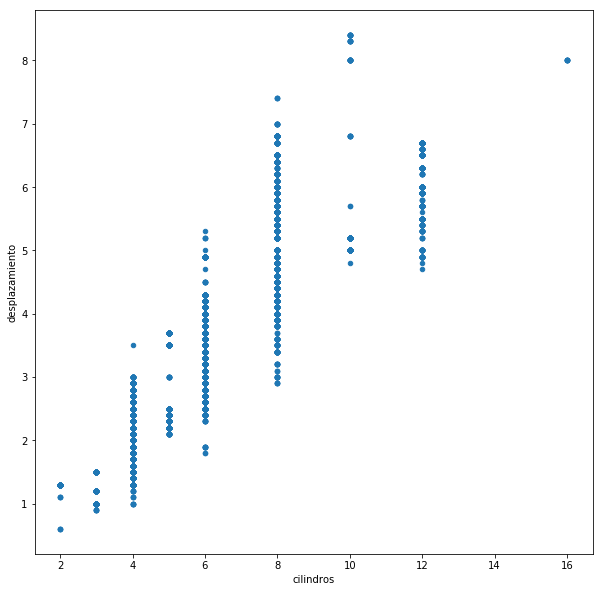

In [35]:
vehicles.plot.scatter(x="cilindros",y="desplazamiento")

In [40]:
def recount_evolution(col_calculo):
    for category in vehicles_pre_2017[col_calculo].unique():
        n_vehiculos_categoria_ano = vehicles_pre_2017[vehicles_pre_2017[col_calculo]==category].groupby(
            'year').apply(np.size)
        plt.plot(
            n_vehiculos_categoria_ano.index,
            n_vehiculos_categoria_ano,
            label=category
        )
        plt.legend()

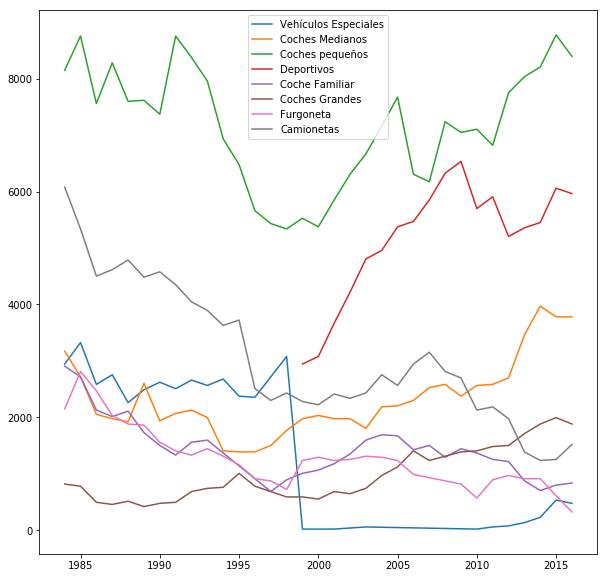

In [41]:
recount_evolution("clase_tipo")



# Conclusions of the analysis


#### Description

The dataset consists of information relating to vehicles sold in the USA since 1985. This information includes technical details (displacement, type of transmission) and environmental details (gasoline consumption, CO2 emissions)


The original file is at: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip
The file I use is a modified version (with fewer columns)

Description of the Original dataset
http://www.fueleconomy.gov/feg/ws/index.shtml#ft7


The entities of which this dataset consists are:

- manufacturer
- manufacturer-model
- manufacturer-model-year
- manufacturer-year


The variables that exist in said dataset are:

```
manufacturer       categorical
model              categorical
year               ordinal/numérical
displacement       numérical
cylinders          numérical
transmission       categorical
traction           categorical
class              categorical
gas                categorical
consumption        numérical
co2                numérical
```

#### QA


- The variables displacement, cylinders, transmission and traction have nonexistent values
- there is an outlier in the variables `co2` and` consumption`
- There are hybrid cars and electric cars (we have removed the latter as they do not pollute).
- The variable `consumption` is defined in miles per gallon and the variable` co2` is defined as grams per mile. Since co2 is the main variable of the dataset, we have created the variable `consumption_litros_milla` defined as liters per mile to be able to compare with` co2`

####  Distribution of variables


- No numerical variable follows a normal distribution

- the numerical variable `cylinders` has an unbalanced distribution of discrete values ​​(displacement of 2 and 4 and 8 add up to 95% of the vehicles). It could be grouped as a categorical variable (2, 4, 8 and another)

- The manufacturer with the largest number of models is Chevrolet (10% of the total)

- 65% of the vehicles use normal gasoline

- The distribution of motor and consumption sizes and co2 is balanced throughout the range

- 70% of the vehicles use two-wheel drive

- Two thirds of cars have automatic transmission

- The majority class of vehicles is that of small cars (35% of the total)

- There are linear relationships between cylinders / displacement and co2 / consumption_litros_milla

#### Comparisons


- There are more low-consumption two-wheel vehicles than 4-wheel drive
- Manufacturers concentrate more on small / low consumption motor vehicles and very large / high consumption engine
- Most cars have automatic transmission, with small cars having similar values ​​of automatic and manual cars
- There are a number of trucks that are more polluting than any other type of car
- Vehicles with automatic transmission have slightly higher CO2 and consumption values
- Vans and vans have the highest consumption (around 0.25 liters / mile). On the other hand, family and small cars have the lowest gasoline consumption (~ 0.15 liters / mile)
- the values ​​of co2 are similar regardless of the type of gasoline used
- Premium gas trucks consume 38% more than small vehicles that use the same type of gasoline
- The consumption and emission of CO2 have been falling continuously since 1985
- Historically it has been increasing the displacement in manufactured vehicles, but as of 2010 this trend is reversed